In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np
import math

In [3]:
daysInMonth = [31,28,31,30,31,30,31,31,30,31,30,31]
SCEdf = pd.read_csv("MedIndPros.csv")
#creates hourly TOU profile (using processed SCE data)
TOU = [[] for i in range(12)]
for date in SCEdf:
    if "Unnamed" in date:
        continue
    month = int(date.split("/")[0])-1
    TOU[month].extend(SCEdf[date].as_matrix())

In [4]:
PGEdf = pd.read_csv("PGE MedCom.csv")

#Obtains each column in PGE Medium Comercial as a list
PGEdata = []
for hour in PGEdf:
    if ":" in hour:
        PGEdata.append(PGEdf[hour].as_matrix())

#Loops through data to store hourly load profile
PGEHalfHourlyLoad = []
for day in range(len(PGEdata[0])):
    for hour in range(len(PGEdata)):
        PGEHalfHourlyLoad.append(PGEdata[hour][day])
        
#Calculates monthly load profile
PGEMonthlyLoad = []
cur = 0
for days in daysInMonth:
    PGEMonthlyLoad.append(np.sum(PGEHalfHourlyLoad[cur:cur + days*48]))
    cur += days*48

#Generates hourly load profile from half-hourly
PGEHourlyLoad = []
index = 1
while(index+1 < len(PGEHalfHourlyLoad)):
    PGEHourlyLoad.append(PGEHalfHourlyLoad[index] + PGEHalfHourlyLoad[index+1])
    index += 2

#Generate PGE hourly load profile using TOU data and monthly load profile
PGEgenerated = []
for i in range(len(PGEMonthlyLoad)):
    l = PGEMonthlyLoad[i]
    for x in TOU[i]:
        PGEgenerated.append(l * x)

PGEgenerated = PGEgenerated[48:len(PGEgenerated)]

#Calculate percent error for each hour
PGEerrors = []
for i in range(0,len(PGEgenerated)):
    err = (PGEHourlyLoad[i] - PGEgenerated[i] )/PGEHourlyLoad[i]
    if(err < 0): err = -1 * err
    PGEerrors.append(err)

#Print statistics
print("MEAN = " + str(np.mean(PGEerrors)))
print("STD = " + str(np.std(PGEerrors)))

MEAN = 0.1059393578992557
STD = 0.09068017733468323


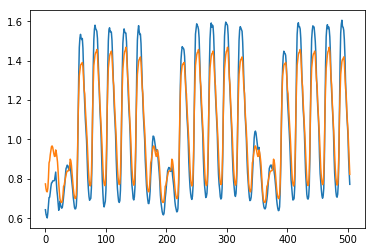

In [5]:
plt.plot(PGEHourlyLoad[0:24*7*3])
plt.plot(PGEgenerated[0:24*7*3])

In [6]:
BGEdf = pd.read_csv("BGE3.csv")

#Obtains each column of the BGE data as a lsit
BGEdata = []
for e in BGEdf:
    if ":" in e:
        BGEdata.append(BGEdf[e].as_matrix())

#Loops through the BGE data to store hourly load profile
BGEHourlyLoad = []
for i in range(len(BGEdata[0])):
    for j in range(len(BGEdata)):
        BGEHourlyLoad.append(BGEdata[j][i])

#Calculates monthly load profile
BGEMonthlyLoad = []
cur = 0
for e in daysInMonth:
    BGEMonthlyLoad.append(np.sum(BGEHourlyLoad[cur:cur + e *24]))
    cur += e*24
    
#Generate BGE hourly load profile using TOU data and monthly load profile
BGEgenerated = []
for i in range(12):
    l = BGEMonthlyLoad[i]
    if(l == 0): continue
    for x in TOU[i]:
        BGEgenerated.append(l * x)
        


#Calculate percent error for each hour
BGEerrors = []
for i in range(0,8760):
    if(BGEHourlyLoad[i] == 0):
        BGEerrors.append(0)
        continue
    err = (BGEHourlyLoad[i] - BGEgenerated[i] )/ BGEHourlyLoad[i]
    if(err < 0): err = -1 * err
    if(not math.isnan(err)):
        BGEerrors.append(float(err))
    else:
        BGEerrors.append(0)
        

#Print statistics
print("MEAN = " + str(np.mean(BGEerrors)))
print("STD = " + str(np.std(BGEerrors)))

MEAN = 0.08951424333216762
STD = 0.0664238654339376


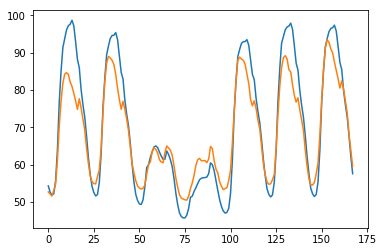

In [7]:
#Plots accounting for year
plt.plot(BGEgenerated[24*7:24*7*2])
plt.plot(BGEHourlyLoad[24*7:24*7*2])

(array([591., 592., 563., 581., 576., 562., 556., 581., 534., 517., 421.,
        373., 362., 301., 259., 231., 188., 145., 151., 128.,  92.,  72.,
         69.,  62.,  53.,  42.,  25.,  27.,  17.,  19.,  18.,  11.,   6.,
          6.,   8.,   2.,   3.,   3.,   4.,   2.,   1.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   2.,   1.]),
 array([0.        , 0.01019692, 0.02039384, 0.03059075, 0.04078767,
        0.05098459, 0.06118151, 0.07137842, 0.08157534, 0.09177226,
        0.10196918, 0.11216609, 0.12236301, 0.13255993, 0.14275685,
        0.15295376, 0.16315068, 0.1733476 , 0.18354452, 0.19374144,
        0.20393835, 0.21413527, 0.22433219, 0.23452911, 0.24472602,
        0.25492294, 0.26511986, 0.27531678, 0.28551369, 0.29571061,
        0.30590753, 0.31610445, 0.32630137, 0.33649828, 0.3466952 ,
        0.35689212, 0.36708904, 0.37728595, 0.38748287, 0.39767979,
        0.40787671, 0.41807362, 0.42827054, 0.43846746, 0.44866438,
        0.45886129, 0.46905821, 0.47925513, 0.

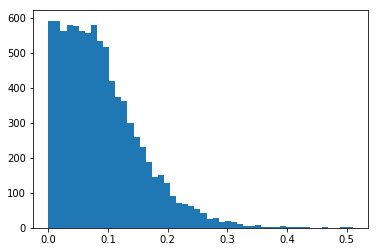

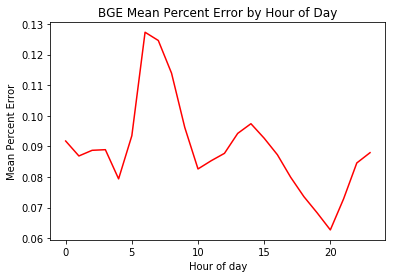

In [9]:
BGEerrorsbyhour = []
for i in range(24):
    BGEerrorsbyhour.append([])

while(i < len(BGEerrors)):
    for j in range(0,24):
        if(i + j < len(BGEerrors)):
            BGEerrorsbyhour[j].append(BGEerrors[i+j])
    i += 24

BGEerrorsbyhourmean = []
for i in range(24):
    BGEerrorsbyhourmean.append(np.mean((BGEerrorsbyhour[i])))

plt.title("BGE Mean Percent Error by Hour of Day")
plt.ylabel("Mean Percent Error")
plt.xlabel("Hour of day")
plt.plot(BGEerrorsbyhourmean,'r')

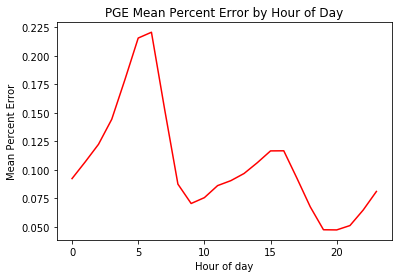

In [10]:
PGEerrorsbyhour = []
for i in range(24):
    PGEerrorsbyhour.append([])

while(i < len(PGEerrors)):
    for j in range(0,24):
        if(i + j < len(PGEerrors)):
            PGEerrorsbyhour[j].append(PGEerrors[i+j])
    i += 24

PGEerrorsbyhourmean = []
for i in range(24):
    PGEerrorsbyhourmean.append(np.mean((PGEerrorsbyhour[i])))

plt.title("PGE Mean Percent Error by Hour of Day")
plt.ylabel("Mean Percent Error")
plt.xlabel("Hour of day")
plt.plot(PGEerrorsbyhourmean,'r')

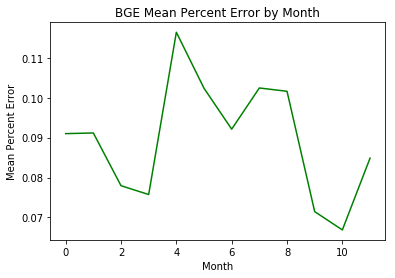

In [11]:
BGEerrorsbymonth = []

cur = 0
for e in daysInMonth:
    BGEerrorsbymonth.append(np.mean(BGEerrors[cur:cur + 24*e]))
    cur += 24 * e

plt.title("BGE Mean Percent Error by Month")
plt.ylabel("Mean Percent Error")
plt.xlabel("Month")
plt.plot(BGEerrorsbymonth,'g')

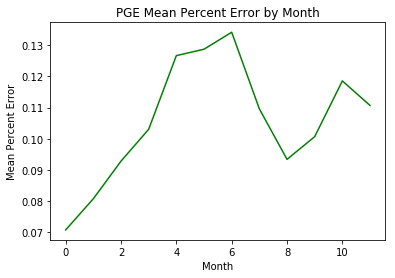

In [12]:
PGEerrorsbymonth = []

cur = 0
for e in daysInMonth:
    PGEerrorsbymonth.append(np.mean(PGEerrors[cur:cur + 24*e]))
    cur += 24 * e

plt.title("PGE Mean Percent Error by Month")
plt.ylabel("Mean Percent Error")
plt.xlabel("Month")
plt.plot(PGEerrorsbymonth,'g')


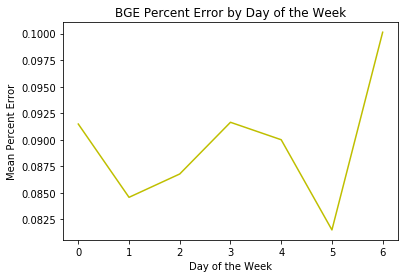

In [13]:
BGEerrorsbyday = []
for i in range(7):
    BGEerrorsbyday.append([])
    
index = 3
i = 0


while(i + 24 < len(BGEerrors)):
    BGEerrorsbyday[index].append(np.sum(BGEerrors[i:i+24])/24)
    index = (index + 1)%7
    i += 24

BGEerrorsbydaymean = [] * 7
for i in range(7):
    BGEerrorsbydaymean.append(np.mean(BGEerrorsbyday[i]))

plt.title("BGE Percent Error by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Percent Error")
plt.plot(BGEerrorsbydaymean,'y')


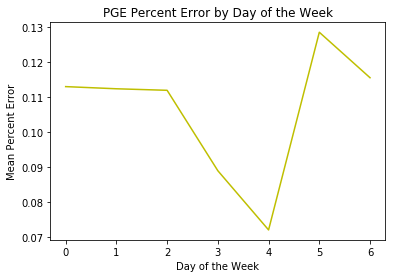

In [14]:
PGEerrorsbyday = []
for i in range(7):
    PGEerrorsbyday.append([])
    
index = 3
i = 0


while(i + 24 < len(PGEerrors)):
    PGEerrorsbyday[index].append(np.sum(PGEerrors[i:i+24])/24)
    index = (index + 1)%7
    i += 24

PGEerrorsbydaymean = [] * 7
for i in range(7):
    PGEerrorsbydaymean.append(np.mean(PGEerrorsbyday[i]))

plt.title("PGE Percent Error by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Percent Error")
plt.plot(PGEerrorsbydaymean,'y')


(array([9.150e+02, 1.026e+03, 1.006e+03, 9.650e+02, 9.720e+02, 7.870e+02,
        7.390e+02, 5.200e+02, 4.080e+02, 3.040e+02, 2.160e+02, 1.550e+02,
        1.340e+02, 9.200e+01, 7.300e+01, 7.700e+01, 5.900e+01, 5.600e+01,
        5.100e+01, 4.200e+01, 2.500e+01, 2.500e+01, 1.400e+01, 3.000e+00,
        8.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([9.02541833e-06, 1.94254597e-02, 3.88418939e-02, 5.82583281e-02,
        7.76747624e-02, 9.70911966e-02, 1.16507631e-01, 1.35924065e-01,
        1.55340499e-01, 1.74756934e-01, 1.94173368e-01, 2.13589802e-01,
        2.33006236e-01, 2.52422670e-01, 2.71839105e-01, 2.91255539e-01,
        3.10671973e-01, 3.30088407e-01, 3.49504842e-01, 3.68921276e-01,
        3.883377

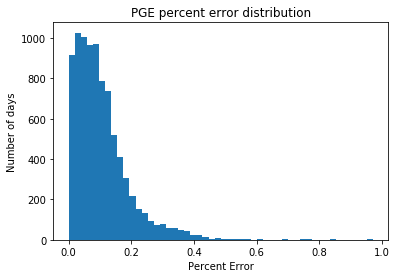

In [26]:
plt.title("PGE percent error distribution")
plt.ylabel("Number of days")
plt.xlabel("Percent Error")
plt.hist(PGEerrors,bins=50)

(array([591., 592., 563., 581., 576., 562., 556., 581., 534., 517., 421.,
        373., 362., 301., 259., 231., 188., 145., 151., 128.,  92.,  72.,
         69.,  62.,  53.,  42.,  25.,  27.,  17.,  19.,  18.,  11.,   6.,
          6.,   8.,   2.,   3.,   3.,   4.,   2.,   1.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   2.,   1.]),
 array([0.        , 0.01019692, 0.02039384, 0.03059075, 0.04078767,
        0.05098459, 0.06118151, 0.07137842, 0.08157534, 0.09177226,
        0.10196918, 0.11216609, 0.12236301, 0.13255993, 0.14275685,
        0.15295376, 0.16315068, 0.1733476 , 0.18354452, 0.19374144,
        0.20393835, 0.21413527, 0.22433219, 0.23452911, 0.24472602,
        0.25492294, 0.26511986, 0.27531678, 0.28551369, 0.29571061,
        0.30590753, 0.31610445, 0.32630137, 0.33649828, 0.3466952 ,
        0.35689212, 0.36708904, 0.37728595, 0.38748287, 0.39767979,
        0.40787671, 0.41807362, 0.42827054, 0.43846746, 0.44866438,
        0.45886129, 0.46905821, 0.47925513, 0.

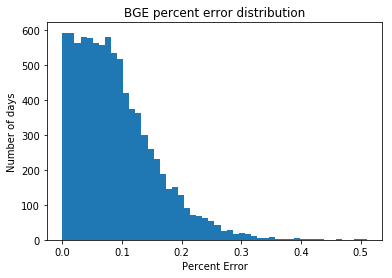

In [27]:
plt.title("BGE percent error distribution")
plt.ylabel("Number of days")
plt.xlabel("Percent Error")
plt.hist(BGEerrors,bins=50)